# Scaling

**Linear Scaling:**
1. Standard Scaler: Values from -3 ro 3.
2. Min-Max Scaler: Values from 0 to 1.
3. Max Abs Scaler: Values from -1 to 1.

if the algorithm is sensitive to negative values, use Min-Max Scaler, otherwise use Standard Scaler or Max Abs Scaler.

# 1. Standard Scaler

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
df= {'Age': [33, 44, 22, 44, 55, 33, 22, 44, 55, 33],
     'Height': [150, 160, 170, 180, 190, 150, 160, 170, 180, 190],
     'Weight': [50, 60, 70, 80, 90, 50, 60, 70, 80, 90]}

In [3]:
df = pd.DataFrame(df)

In [4]:
df.head()

,Age,Height,Weight
0,33,150,50
1,44,160,60
2,22,170,70
3,44,180,80
4,55,190,90


In [5]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)

In [6]:
scaled_df

array([[-0.48795004, -1.41421356, -1.41421356],
       [ 0.48795004, -0.70710678, -0.70710678],
       [-1.46385011,  0.        ,  0.        ],
       [ 0.48795004,  0.70710678,  0.70710678],
       [ 1.46385011,  1.41421356,  1.41421356],
       [-0.48795004, -1.41421356, -1.41421356],
       [-1.46385011, -0.70710678, -0.70710678],
       [ 0.48795004,  0.        ,  0.        ],
       [ 1.46385011,  0.70710678,  0.70710678],
       [-0.48795004,  1.41421356,  1.41421356]])

In [7]:
# convert the scaled array back to a dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,Age,Height,Weight
0,-0.48795,-1.414214,-1.414214
1,0.48795,-0.707107,-0.707107
2,-1.46385,0.000000,0.000000
3,0.48795,0.707107,0.707107
4,1.46385,1.414214,1.414214


# 2. Min-Max Scaler

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler=MinMaxScaler()
scaled_df1=scaler.fit_transform(df)
scaled_df1=pd.DataFrame(scaled_df1, columns=df.columns)
scaled_df1.head()

,Age,Height,Weight
0,0.333333,0.00,0.00
1,0.666667,0.25,0.25
2,0.000000,0.50,0.50
3,0.666667,0.75,0.75
4,1.000000,1.00,1.00


# 3. Max Abs Scaler

In [12]:
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler()
scaled_df=scaler.fit_transform(df)
scaled_df=pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,Age,Height,Weight
0,0.6,0.789474,0.555556
1,0.8,0.842105,0.666667
2,0.4,0.894737,0.777778
3,0.8,0.947368,0.888889
4,1.0,1.000000,1.000000


# 4. Robust Scaler

In [13]:
 from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaled_df=scaler.fit_transform(df)
scaled_df=pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,Age,Height,Weight
0,-0.5,-1.0,-1.0
1,0.5,-0.5,-0.5
2,-1.5,0.0,0.0
3,0.5,0.5,0.5
4,1.5,1.0,1.0


----
# Transformation

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# generate a non normal dataset (exponential distribution)
np
df=np.random.exponential(size=1000, scale=2)
df=pd.DataFrame(df, columns=['value'])

In [17]:
df.head()

,value
0,0.891815
1,0.520004
2,0.959692
3,1.407936
4,3.380363


<Axes: ylabel='Count'>

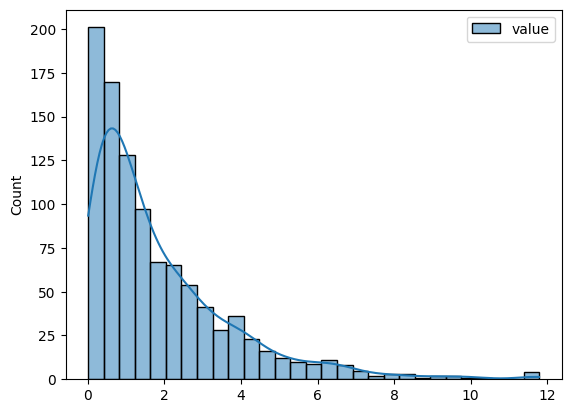

In [18]:
sns.histplot(df, kde=True)

In [23]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox=PowerTransformer(method='box-cox')
pt_yeojohnson=PowerTransformer(method='yeo-johnson')
pt_quantile=QuantileTransformer(output_distribution='normal')

# For Box-Cox Transformation data should be positive
df['Box-Cox']=pt_boxcox.fit_transform(df[['value']] + 1)  # adding 1 is must for box-cox transformation
df['Yeo-Johnson']=pt_yeojohnson.fit_transform(df[['value']])
df['Quantile']=pt_quantile.fit_transform(df[['value']])
df.head()

,value,Box-Cox,Yeo-Johnson,Quantile
0,0.891815,-0.343490,-0.343490,-0.260089
1,0.520004,-0.811294,-0.811294,-0.661162
2,0.959692,-0.272248,-0.272248,-0.213636
3,1.407936,0.122682,0.122682,0.127052
4,3.380363,1.086528,1.086528,0.969427


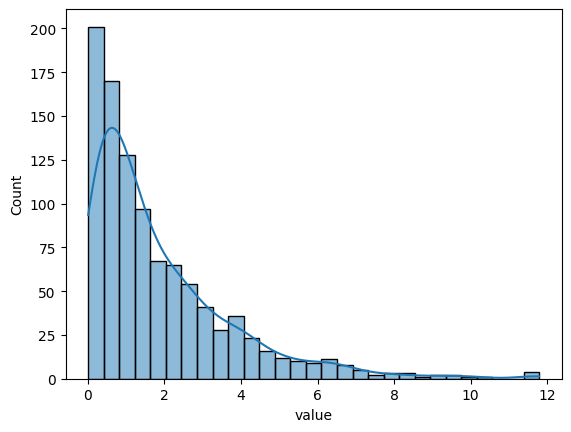

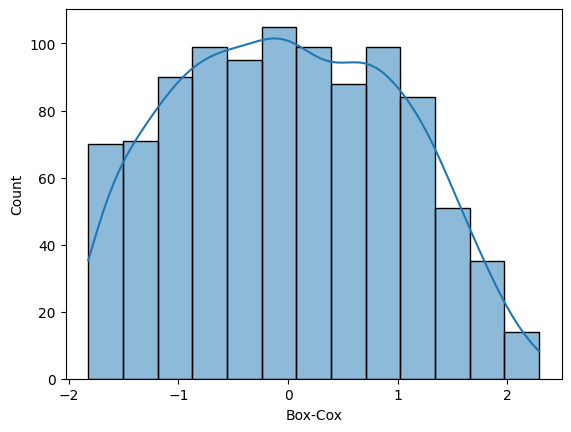

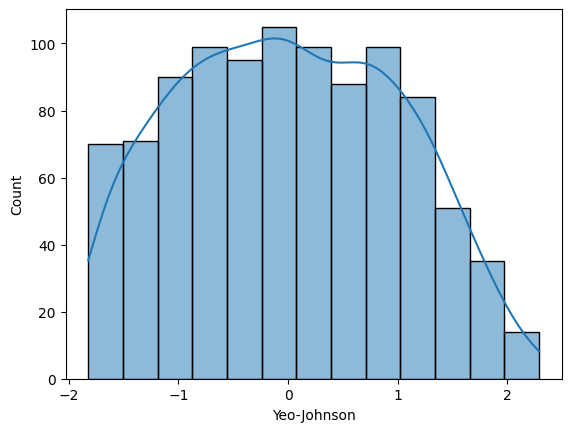

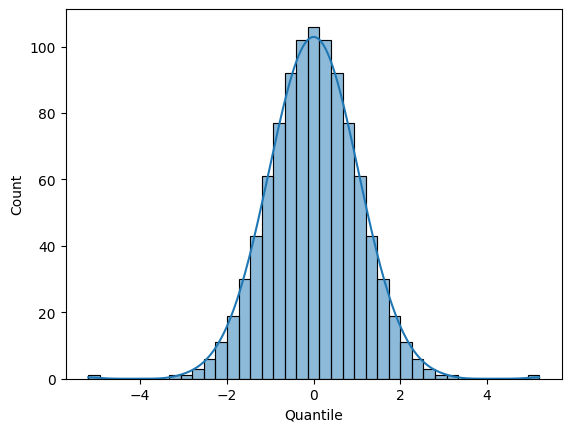

In [24]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

----
# Normalization 

## L2 Normalization
Rescale each sample to have a length of 1 (unit norm). This process is known as L2-normalization.
This type of normalization is often used when only the text data.

In [25]:
from sklearn.preprocessing import Normalizer
data=[[1,1,1],[1,1,0],[1,0,0]]
normalizer=Normalizer(norm='l2')
normalizer.fit_transform(data)
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


## L1 Normalization
Rescale each sample to have a length of 1 (unit norm). This process is known as L1-normalization.
Ensure that the sum of the absolute values of the elements of each sample is 1.

In [26]:
data=[[1,1,1],[1,1,0],[1,0,0]]
normalizer=Normalizer(norm='l1')
normalizer.fit_transform(data)
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


Other normalization techniques:
1. Min-Max Normalization
2. Z-Score Normalization

To utilize these Techniques we used their scaler methods like MinMaxScaler and StandardScaler. So the data is normalized and scaled at the same time.  

# Log Transformation

In [31]:
# example dataset with skewed values
df={"values":[1,2,3,4,5,10,50,100,1000,1500,2000,3000,3000,5000,10000]}
df=pd.DataFrame(df)

<Axes: ylabel='Count'>

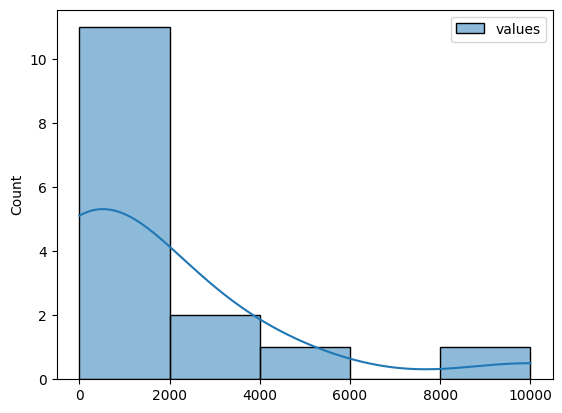

In [32]:
sns.histplot(df, kde=True)

<Axes: xlabel='log_values', ylabel='Count'>

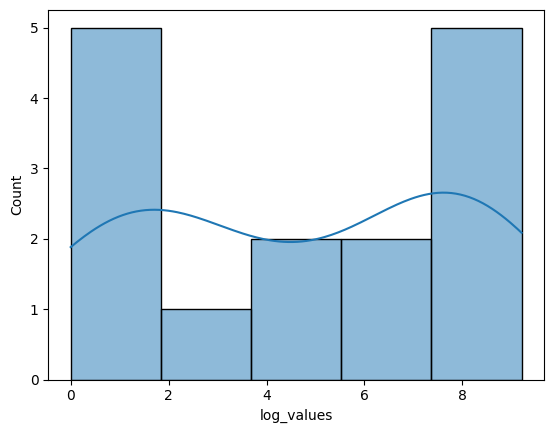

In [34]:
df['log_values']=np.log(df['values'])
sns.histplot(df['log_values'], kde=True)